B. Где все клиенты?
Одна из проблем в сфере услуг – отток клиентов. Многие клиекты покупают абонементы, но перестают посещать заведения, и отменяют их до истечения срока. Аднимистрация фитнес-центра собирается понять, что заставляет пользователей уйти, и выработать стратегию по работе с клиентами. Для борьбы с оттоком собрана информация о клиетах.
Данные можно скачать по ссылке https://yadi.sk/d/Fr6homfYTsakFw.
Данные

Row – (int) индекс строки данных
Registration – (int) уникальный номер клиента
Zipcode – (int) индекс клиента
Age – (int) возраст
Partner_company – (0/1) продан ли абонемент по партнерской программе
Friend_promo – (0/1) продан ли абонемент по рекомендации друга
Contract_period – (int) продолжительность подписки в месяцах
Lifetime – (int) продожительность истории посещений
Class_registration_weekly – (ﬂoat) среднее число занятий в неделю
Avg_additional_charges_total – (ﬂoat) средняя плата за дополнительные услуги
Cancellation_freq – (ﬂoat) (ﬂoat) среднее число отмен и пропусков занятий
Exited – (0/1) анулирован ли абонемент
Изучите профили клиентов и проанализируйте, почему они отказываются от услуг. Составьте прогноз для разных групп клиентов: тех, кто может уйти, и тех, кто останется.
Вам нужно составить прогноз для каждого конкретного клиента.
В вашем распоряжении есть также дополнительный список клиентов, которые выражали такие же недовольства. На основе их данных нужно предсказать, кто из них уйдет, а кто останется. Новые данные для прогнозирования находятся в файле ниже.

Формат ввода
Данные можно скачать по ссылке https://yadi.sk/d/myTXgFfCsRRqoQ.
Формат вывода
gym_test.csv с добавленной колонкой Exited, заполненной значениями предсказаний 0 или 1.
Замечание: Не изменяйте порядок столбцов в таблице.

Примечания
Вам не обязательно использовать специфические инструменты анализа данных, но вы можете.
Подсказка: Попробуйте найти правила по размеченной выборке и используйте эти эвристики для решения.
Решение будет зачтено, если значение F1-меры будет не менее 0.9.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, roc_curve, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix


In [11]:
data = pd.read_csv("gym_data.csv", sep = ',')
data=data.drop(['Unnamed: 12', "Row", "Zipcode", 'Registration'], axis=1)

In [12]:
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8100 non-null   int64  
 1   Partner_company               8100 non-null   int64  
 2   Friend_promo                  8100 non-null   int64  
 3   Contract_period               8100 non-null   int64  
 4   Lifetime                      8100 non-null   int64  
 5   Class_registration_weekly     8100 non-null   float64
 6   Avg_additional_charges_total  8100 non-null   float64
 7   Cancellation_freq             8100 non-null   float64
 8   Exited                        8100 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 569.7 KB


,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,37,0,1,6,10,1.06,134.200000,0.01,0
1,32,0,1,12,7,1.54,177.600000,0.07,0
2,29,0,1,6,5,2.15,205.000000,0.28,0
3,76,1,0,6,5,3.10,220.666667,0.39,0
4,24,1,0,1,3,1.00,142.040000,0.12,1
5,43,0,0,6,4,1.27,59.500000,0.13,1
6,49,1,1,6,5,1.17,62.780000,0.06,1
7,38,0,1,1,5,0.35,188.333333,0.00,0
8,26,1,0,1,2,3.78,207.666667,0.00,0
9,33,0,1,12,2,1.98,205.640000,0.00,0


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8100.0,38.788395,11.071217,16.0,31.00,37.00,44.00,92.00
Partner_company,8100.0,0.507654,0.499972,0.0,0.00,1.00,1.00,1.00
Friend_promo,8100.0,0.492840,0.499980,0.0,0.00,0.00,1.00,1.00
Contract_period,8100.0,6.902716,4.868075,1.0,1.00,6.00,12.00,12.00
Lifetime,8100.0,4.583086,2.702545,1.0,3.00,4.00,6.00,23.00
Class_registration_weekly,8100.0,1.540884,0.802345,0.0,0.95,1.50,2.08,4.65
Avg_additional_charges_total,8100.0,177.894673,58.866795,7.6,137.28,187.22,223.00,317.20
Cancellation_freq,8100.0,0.133910,0.138021,0.0,0.02,0.10,0.20,0.86
Exited,8100.0,0.244815,0.430004,0.0,0.00,0.00,0.00,1.00


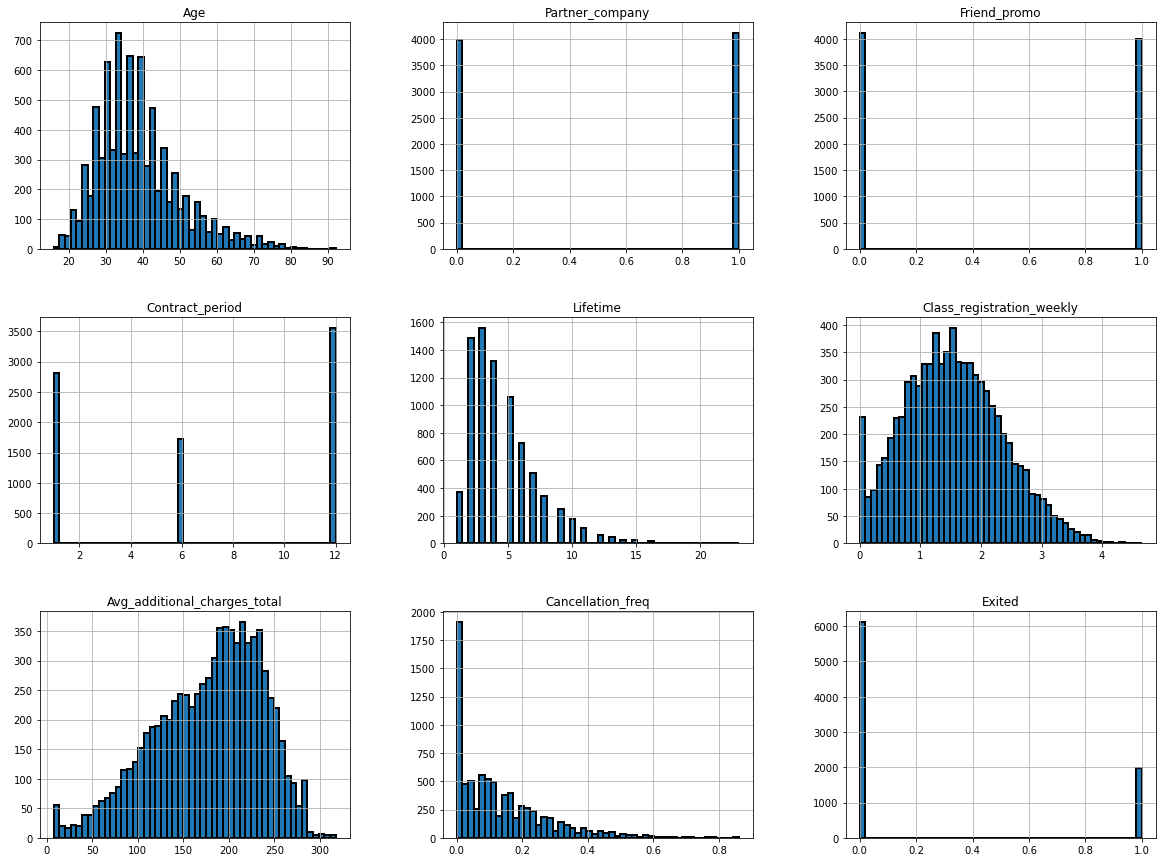

In [15]:
data.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()


In [16]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [20]:
features_train, target_train = split_data(data,'Exited')

In [21]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_train, target_train)



DecisionTreeClassifier(max_depth=6, random_state=12345)

In [29]:
data_test = pd.read_csv("gym_test.csv", sep = ',')

In [30]:
data_test=data_test.drop([ "Row", "Zipcode", 'Registration'], axis=1)


In [31]:
features_test, target_test = split_data(data_test,'Exited')

In [32]:
predicted_valid = model.predict(features_test)

In [33]:
dt=pd.read_csv("gym_test.csv", sep = ',')
dt=dt.drop([ "Exited"], axis=1)
new_column = pd.DataFrame({'Exited': predicted_valid})
dt = dt.merge(new_column, left_index = True, right_index = True)
dt.to_csv('filename.csv', index = False)

In [34]:
dt.info()
display(dt.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Row                           200 non-null    int64  
 1   Registration                  200 non-null    int64  
 2   Zipcode                       200 non-null    int64  
 3   Age                           200 non-null    int64  
 4   Partner_company               200 non-null    int64  
 5   Friend_promo                  200 non-null    int64  
 6   Contract_period               200 non-null    int64  
 7   Lifetime                      200 non-null    int64  
 8   Class_registration_weekly     200 non-null    float64
 9   Avg_additional_charges_total  200 non-null    float64
 10  Cancellation_freq             200 non-null    float64
 11  Exited                        200 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 18.9 KB


,Row,Registration,Zipcode,Age,Partner_company,Friend_promo,Contract_period,Lifetime,Class_registration_weekly,Avg_additional_charges_total,Cancellation_freq,Exited
0,1001,2006682,29941,36,0,1,6,2,0.72,225.666667,0.01,0
1,1002,2008504,57328,37,1,0,12,8,1.29,166.666667,0.11,0
2,1003,2020638,33726,50,1,1,1,2,1.18,101.430000,0.12,1
3,1004,2021568,29941,38,0,1,12,5,0.13,215.000000,0.00,0
4,1005,2028557,33726,28,0,1,12,11,1.25,160.720000,0.13,0
5,1006,2032662,57328,51,1,0,12,3,2.77,193.000000,0.21,0
6,1007,2051269,29941,50,1,0,6,3,2.36,228.000000,0.00,0
7,1008,2064349,57328,39,0,0,1,2,0.76,70.200000,0.34,1
8,1009,2069129,29941,46,1,1,1,3,0.93,88.200000,0.26,1
9,1010,2070230,29941,31,1,0,1,3,1.52,153.690000,0.08,0
